In [1]:
import lorm
from nfft import nfsft
import disc.energy_curveling_s2
from pythreejs import *
from IPython.display import display
#from ipywidgets import VBox, HBox, Checkbox, jslink
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
#img = plt.imread('data/earth.png')
#plt.imshow(img)

#N_img = img.shape[0]
#theta = np.linspace(np.pi/(2*N_img),np.pi-np.pi/(2*N_img),img.shape[0],endpoint=True)
#phi = np.linspace(0,2*np.pi,2*N_img,endpoint=False)

#theta_grid,phi_grid = np.meshgrid(theta,phi)
#quat_nodes = np.array([theta_grid.ravel()[::-1],phi_grid.ravel()[:]]).transpose()

#nfsft_plan = nfsft.plan(2*N_img**2,N_img)
#nfsft_plan.set_local_coords(quat_nodes) 
#img_hat = nfsft_plan.compute_Ymatrix_adjoint_multiplication(img.transpose().ravel()[:]*np.sin(quat_nodes[:,0]),N_img)
#img_hat.array[:] = img_hat.array[:]/ img_hat[0,0]
#plt.imshow(np.real(nfsft_plan.compute_Ymatrix_multiplication(img_hat).reshape(360,180)).transpose())

In [3]:
#img_hat[2,:]

In [4]:
#np.savetxt('data/earth_hat.txt',img_hat.array.view(float))

In [5]:
N_img = 180
img_hat = nfsft.SphericalFourierCoefficients(180)
img_hat.array[:] = np.loadtxt("data/earth_hat.txt").view(complex)
img_hat[2,:]

array([-0.05882414-0.01051611j,  0.04670267+0.0436636j ,
        0.11068636+0.j        ,  0.04670267-0.0436636j ,
       -0.05882414+0.01051611j])

In [6]:
def update_points(p):
    g1.attributes['position'].array = p.coords
    return

In [7]:
s2 = lorm.manif.Sphere2()
points = lorm.manif.ManifoldPointArrayParameterized(s2)
points_new = lorm.manif.ManifoldPointArrayParameterized(s2)

In [8]:
m = 200
local_coords = np.zeros([m,2])
for i in range(m):
    local_coords[i,0] = np.pi/2*(1+0.4*np.sin(2*np.pi*i/m))
    local_coords[i,1] = 2*np.pi*i/m
points.local_coords = local_coords

In [8]:
points.coords = np.loadtxt('data/earth_points.txt')
points_new.coords = points.coords

In [9]:
points.coords.shape[0]

204800

In [10]:
L=2000#10*2**6
N=int(1000)#int(L)
L/=1.03
m = points.coords.shape[0]
energy = disc.energy_curveling_s2.plan(m,N,0*100/L**5,L)
if N <= img_hat.N:
    for n in range(N+1):
        energy._mu_hat[n,:] = img_hat[n,:]
if N > img_hat.N:
    for n in range(img_hat.N+1):
        energy._mu_hat[n,:] = img_hat[n,:]

/home/grman/.local/lib/python3.7/site-packages/pythreejs/traits.py:177: UserWarning: 64-bit data types not supported for WebGL data, casting to 32-bit.
  warnings.warn('64-bit data types not supported for WebGL '


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.5, position=(3.0, 5.0,…

<IPython.core.display.Javascript object>


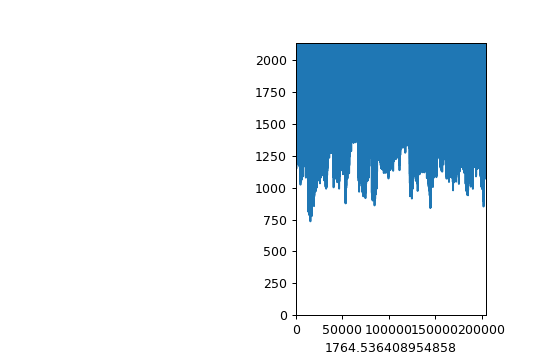

In [14]:
g1 = BufferGeometry(attributes={'position': BufferAttribute(points.coords, normalized=False) })
m1 = LineBasicMaterial(vertexColors='VertexColors', linewidth=2)
line1 = Line(g1,m1)
g2 = BufferGeometry(attributes={'position': BufferAttribute(points.coords, normalized=False) })
m2 = LineBasicMaterial(vertexColors='VertexColors', linewidth=1)
line2 = Line(g2,m2)

c = PerspectiveCamera(position=[0, 2, 2], up=[0, 2, 0],
                      children=[DirectionalLight(color='white', position=[3, 5, 1], intensity=0.5)])
sphere = Mesh(SphereBufferGeometry(1,32,16), MeshStandardMaterial(color='white'))

scene = Scene(children=[line1, line2, sphere, c, AmbientLight(color='#777777')])

renderer = Renderer(camera=c,
                    scene=scene, 
                    controls=[OrbitControls(controlling=c)])
renderer.width =1000
renderer.height =1000
display(renderer)

%matplotlib notebook
fig = plt.figure()

bx = fig.add_subplot(122)
#bx.axis(np.array([0,m,0.0060895535,0.0060895545]))
bx.axis(np.array([0,m,0.*energy._L,1.1*energy._L]))
bx.set_xlabel(np.sum(energy._eval_lengths(points.local_coords)))
distance = plt.Line2D(np.linspace(0,m,m),m*energy._eval_lengths(points.local_coords))
bx.add_line(distance)
def update_points(p):
    distance.set_ydata(m*energy._eval_lengths(p.local_coords))
    bx.set_xlabel(np.sum(energy._eval_lengths(p.local_coords)))
    fig.canvas.draw()
    g1.attributes['position'].array = p.coords
    return


In [15]:
#method = lorm.optim.SteepestDescentMethod(max_iter=100)
#energy._L = 10*2**5#9.7432864#12.8
#energy._alpha = 10000/energy._L**5
method = lorm.optim.ConjugateGradientMethod(max_iter=100,tol_grad=1e-14)
method.listener = update_points
#points_new.coords = points.coords.copy()
for i in range(1):
    points_new = method.run(energy,points_new)
    np.savetxt('data/earth_points_{}.txt'.format(i),points_new.coords)
#energy._L = 2000#10*2**6#9.7432864#12.8
#energy._alpha = 10000/energy._L**5
#for i in range(1):
#    points_new = method.run(energy,points_new)
#    np.savetxt('data/earth_2000_refined_b.txt',points_new.coords)


Initial value: f[0] = 6.612318894732791e-10
f[1] = 6.610445235754523e-10
f[2] = 6.608884277227833e-10
f[3] = 6.608109925416448e-10
f[4] = 6.607007476900587e-10
f[5] = 6.605119104037489e-10
f[6] = 6.60365146949542e-10
f[7] = 6.601931392351386e-10
f[8] = 6.595678291152201e-10
f[9] = 6.592597831515898e-10
f[10] = 6.58809447120329e-10
f[11] = 6.583821076500642e-10
f[12] = 6.580854066286294e-10
f[13] = 6.575461398563337e-10
f[14] = 6.571869477603232e-10
f[15] = 6.56552627905372e-10
f[16] = 6.561437861613387e-10
f[17] = 6.557191517076904e-10
f[18] = 6.552151868974321e-10
f[19] = 6.549317415726293e-10
f[20] = 6.544165866439293e-10
f[21] = 6.541286846757845e-10
f[22] = 6.537463404380652e-10
f[23] = 6.533508390503709e-10
f[24] = 6.531263484642749e-10
f[25] = 6.52770100977809e-10
f[26] = 6.523924633277972e-10
f[27] = 6.520772238000952e-10
f[28] = 6.515813658252045e-10
f[29] = 6.512582577734134e-10
f[30] = 6.50795776450786e-10
f[31] = 6.501774461236973e-10
f[32] = 6.497768320630562e-10
f[33] = 6.

In [11]:
tempc = points_new.coords
m2 = len(tempc)
temp = np.zeros([2*m2,3])
for i in range(m2):
    temp[2*i,:] = tempc[i,:]
for i in range(m2-1):
    temp[2*i+1,:] = (tempc[i,:]+tempc[i+1,:])/2
temp[2*m2-1,:] = (tempc[0,:]+tempc[m2-1,:])/2

m = len(temp)
points.coords = temp

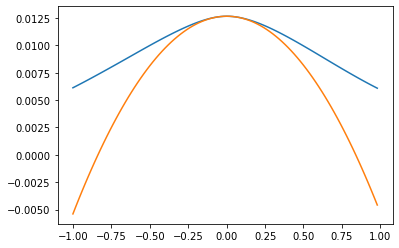

In [34]:
%matplotlib inline
v=energy.grad(points_new)
v.coords *= 1
v.coords = 0.3*np.random.randn(m,3)
f,q, s = lorm.utils.eval_objective_function_with_quadratic_approximation(energy,v)
plt.plot(s,f,s,q)

In [11]:
#np.savetxt('data/earth_640.txt',points_new.coords)

In [21]:
m

204800

In [13]:
'data/earth_points_{}.txt'.format(2)

'data/earth_points_2.txt'